# ML210-Assignment 6: Resampling Methods

Dataset needed:
UCI Diabetes Data Set  (https://archive.ics.uci.edu/ml/datasets/diabetes)


In [1]:
# Imports
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn import (
    ensemble,
    model_selection,    
    preprocessing,
    tree,
)
from sklearn.metrics import (
    auc,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
)
from sklearn.model_selection import (
    train_test_split,
    StratifiedKFold,
)

import pandas_profiling

from sklearn.model_selection import train_test_split

data = pd.read_csv('diabetes.csv')
print(data.info())
data.head()

# emit profiling data
pandas_profiling.ProfileReport(data)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


Number of variables,9
Number of observations,768
Total Missing (%),0.0%
Total size in memory,54.1 KiB
Average record size in memory,72.1 B
Numeric,8
Categorical,0
Boolean,1
Date,0
Text (Unique),0
Rejected,0


<h3> Q.1. Make an 80/20 train/test split</h3>

In [2]:
X = data.loc[:, data.columns != 'Outcome']
y = data.loc[:, data.columns == 'Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

<h3>Q.2. Fit a logistic regression model on the training data</h3>

In [5]:
from sklearn import linear_model

#Initialize classifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

# Initialize logistic regression classifier
log_rgr = LogisticRegression(fit_intercept = True, C = 1) 

# fit X_train and y_train
log_rgr.fit(X_train,y_train)

# Compute the accuracy score
lr_acc = log_rgr.score(X_test, y_test) 
lr_acc

0.7597402597402597

<h3> Q.3. Predict the test data</h3>

In [5]:
#predict on the test set
y_pred = log_rgr.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

<h3> Q.4. Plot the ROC curve and compute the AUC score</h3>

Accuracy: 0.7532467532467533
AUC: 0.8143250688705234


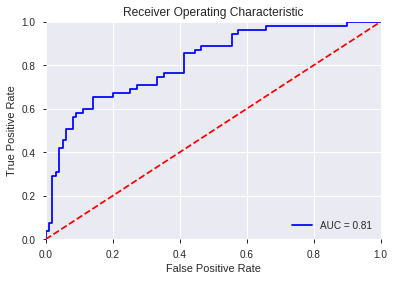

In [6]:
# Plot outputs
import matplotlib.pyplot as plt
import sklearn.metrics
from sklearn import preprocessing, metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score

%matplotlib inline

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

<h3> Q.5. Calculate the accuracy metric of the observations in the test set</h3>

In [7]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
import numpy as np

# Leave one out Cross Validation
loocv = LeaveOneOut()
model_loocv = LogisticRegression(solver = 'lbfgs', max_iter=500)
results_loocv = cross_val_score(model_loocv, X, y, cv=loocv)
print("LOOCV Accuracy: %.2f%% Std error: %.3f%%" % (results_loocv.mean()*100.0, results_loocv.std()*100.0)) 

# K Fold cross validation
kfold = KFold(n_splits=10) # k=10
model_kfold = LogisticRegression(solver = 'lbfgs', max_iter=500)
results_kfold = cross_val_score(model_kfold, X, y, cv=kfold)
print("K-Fold Accuracy: %.2f%% Std error: %.3f%%" % (results_kfold.mean()*100.0, results_kfold.std()*100.0)) 

LOOCV Accuracy: 77.60% Std error: 41.689%
K-Fold Accuracy: 77.60% Std error: 5.158%


## Cross-Validation

## *k-*Fold Cross-Validation

<h3> Q.6. In few sentences, explain how K-fold procedure work<h3>

The procedure has a single parameter called k that refers to the number of groups that a given data sample is to be split into. As such, the procedure is often called k-fold cross-validation. When a specific value for k is chosen, it may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation.

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.

It is a popular method because it is simple to understand and because it generally results in a less biased or less optimistic estimate of the model skill than other methods, such as a simple train/test split.

The general procedure is as follows:

    Shuffle the dataset randomly.
    Split the dataset into k groups
    For each unique group:
        Take the group as a hold out or test data set
        Take the remaining groups as a training data set
        Fit a model on the training set and evaluate it on the test set
        Retain the evaluation score and discard the model
    Summarize the skill of the model using the sample of model evaluation scores

<h3> Q.7. Perform logistic regression using *k-*fold cross validation, try different values of k and print out the mean accuracy obtained.
</h3>

In [8]:
from sklearn.model_selection import cross_val_score

scores = []

# Trying out different values from 2 to 10.
for i in range(2,11):
    kfold = KFold(n_splits=i) # k=i
    model_kfold = LogisticRegression(solver = 'lbfgs', max_iter=500)
    results_kfold = cross_val_score(model_kfold, X, y, cv=kfold)
    print("K = %i%%, K-Fold Accuracy: %.2f%% Std error: %.3f%%" % (i, results_kfold.mean()*100.0, results_kfold.std()*100.0)) 
    scores.append(results_kfold.mean()*100.0)

print(scores)
print("Mean accuracy: ", np.mean(scores))

K = 2%, K-Fold Accuracy: 77.08% Std error: 2.865%
K = 3%, K-Fold Accuracy: 77.34% Std error: 3.043%
K = 4%, K-Fold Accuracy: 76.82% Std error: 2.981%
K = 5%, K-Fold Accuracy: 77.09% Std error: 3.258%
K = 6%, K-Fold Accuracy: 77.60% Std error: 3.304%
K = 7%, K-Fold Accuracy: 77.48% Std error: 4.566%
K = 8%, K-Fold Accuracy: 77.86% Std error: 4.592%
K = 9%, K-Fold Accuracy: 77.61% Std error: 4.320%
K = 10%, K-Fold Accuracy: 77.60% Std error: 5.158%
[77.08333333333333, 77.34375, 76.82291666666666, 77.0902300314065, 77.60416666666666, 77.48480876921245, 77.86458333333333, 77.60753913968688, 77.60423786739577]
Mean accuracy:  77.38950731196684


## The Bootstrap

<h3> Q.8.Print the target class distribution (You can see that there's almost twice as much 0s than 1s)
</h3>

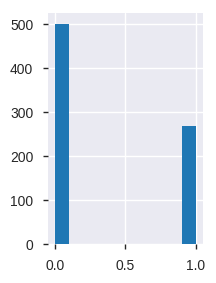

0    500
1    268
Name: Outcome, dtype: int64

In [62]:
X = data['Outcome'].tolist()
fig=plt.figure(figsize=(2,3))
plt.hist(X)
plt.show()

data['Outcome'].value_counts()

Let's perform bootstrapping to up-sample the minority class

1. First, we'll import the resampling module from Scikit-Learn
2. Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class
3. Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.

In [48]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data[data['Outcome'] == 0]
minority_class = data[data['Outcome'] == 1]
 
majority_class_size = len(majority_class.values)

# Upsample minority class
minority_upsampled = resample(minority_class, 
                                 replace= True,     # sample with replacement
                                 n_samples=majority_class_size,   # to match majority class
                                 random_state=42)   # reproducible results

minority_upsampled.describe()

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([majority_class, minority_upsampled])

data_upsampled.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,4.191000,124.18900,70.136000,20.883000,84.304000,32.45650,0.476622,34.273000,0.50000
std,3.566685,31.23852,19.231416,16.063105,119.421192,7.58232,0.327363,11.623751,0.50025
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.078000,21.000000,0.00000
25%,1.000000,102.00000,64.000000,0.000000,0.000000,27.80000,0.246750,25.000000,0.00000
50%,3.000000,122.00000,72.000000,24.000000,20.000000,32.40000,0.370000,31.000000,0.50000
75%,7.000000,144.00000,80.000000,33.000000,140.000000,36.60000,0.645250,42.000000,1.00000
max,17.000000,199.00000,122.000000,63.000000,744.000000,67.10000,2.420000,81.000000,1.00000


<h3> Q.9. Display new class counts</h3>

In [52]:
# the new DataFrame should now have more observations than the original, and the ratio of the two classes is now 1:1

# Separate majority and minority classes
negative_class = data_upsampled[data_upsampled['Outcome'] == 0]
positive_class = data_upsampled[data_upsampled['Outcome'] == 1]

print("Outcome negative count: {}, outcome positive count: {}".format(len(negative_class.values), len(positive_class.values)))

Outcome negative count: 500, outcome positive count: 500


<h3> Q.10. Let's train another model using Logistic Regression, this time on the balanced dataset</h3>

Accuracy: 0.775
AUC: 0.8380408653846154


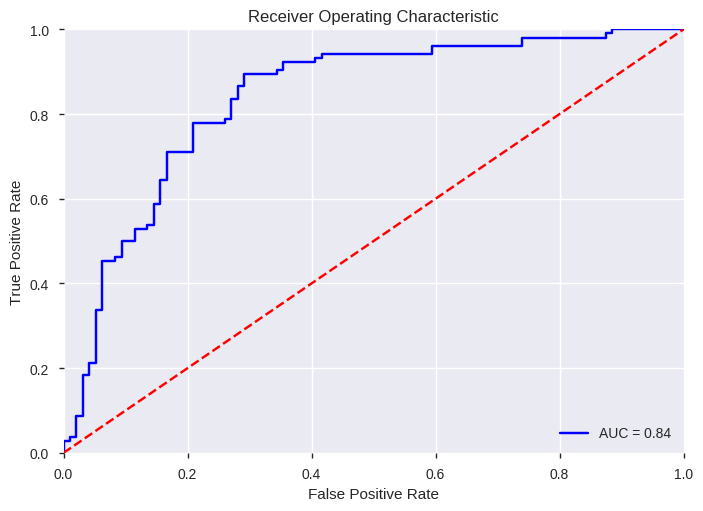

In [54]:
# Separate input features (X) and target variable (y)
X = data_upsampled.loc[:, data_upsampled.columns != 'Outcome']
y = data_upsampled.loc[:, data_upsampled.columns == 'Outcome']

#Perform train test split 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 # Initialize logistic regression classifier
log_rgr = LogisticRegression(fit_intercept = True, C = 1e9) 

# Train model
log_rgr.fit(X_train,y_train)
 
# Predict on training set
y_pred = log_rgr.predict(X_test)

# How's our accuracy? Has it improved? Comment
lr_acc = log_rgr.score(X_test, y_test)
lr_acc

# calculate the fpr and tpr for all thresholds of the classification
probs = log_rgr.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.roc_auc_score(y_test, preds)
print("Accuracy: {}".format(lr_acc))
print("AUC: {}".format(roc_auc))


# Plot the ROC curve
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# We note that with this both AUC and accuracy improved. Thus we can see if we make the class balanced 
# using bootstrap, that might enhance the model performance.

<h3> Q.11. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:
<br>                                                                       
What was your incoming experience with this model, if any?
what steps you took, what obstacles you encountered.
how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)
This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

We learnt different resampling methods in this lesson.

In real world, data is more often than not in an imbalanced. The last part of the assignment was really good, where we could see how to use bootstrap to upsample the minority class and then apply logistic regression. This actually improved the accuracy as well.

Overall I am happy with the assignment as it tested out most of the things that we learnt in the class.
I would like to apply the same resampling method to some other regression or classification model.